# Data analysis on Indian Food Recipies Dataset

#### Data set link (Kaggle): [Link](https://www.kaggle.com/kanishk307/6000-indian-food-recipes-dataset)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [2]:
# loading the data 
data = pd.read_csv('food_data.csv')

### preprocessing & cleaning the data

In [3]:
# exploring the data
data.head(3)

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...


In [4]:
# dimensions of the dataset
data.shape

(6871, 15)

In [5]:
# summary of data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6871 non-null   int64 
 1   RecipeName              6871 non-null   object
 2   TranslatedRecipeName    6871 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6871 non-null   int64 
 6   CookTimeInMins          6871 non-null   int64 
 7   TotalTimeInMins         6871 non-null   int64 
 8   Servings                6871 non-null   int64 
 9   Cuisine                 6871 non-null   object
 10  Course                  6871 non-null   object
 11  Diet                    6871 non-null   object
 12  Instructions            6871 non-null   object
 13  TranslatedInstructions  6871 non-null   object
 14  URL                     6871 non-null   object
dtypes: i

In [6]:
# let's have all the entries in only 1 language, i.e English. 
data.drop('RecipeName', axis=1, inplace=True) # dropping this column as it has the recipe names in both english/hindi.
data.head(3)

,Srno,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...


In [7]:
# renaming the column (which has got the contents in english)
data.rename(columns = {'TranslatedRecipeName':'RecipeName'}, inplace = True)
data.head(5)

,Srno,RecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [8]:
# repeating the same process for the case of: ingredients. 
# Would allow entries only in one language (for better comprehension).

data.drop('Ingredients', axis=1, inplace=True)
data.rename(columns = {'TranslatedIngredients':'Ingredients'}, inplace = True)
data.head(3)

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...


In [9]:
# repeating the same process for the case of: instructions. 

data.drop('Instructions', axis=1, inplace=True) 
data.rename(columns = {'TranslatedInstructions':'Instructions'}, inplace = True)
data.head(3)

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...


In [10]:
# checking for NULL values..
data.isnull().values.any()

True

In [13]:
# NULL values exist, so checking how many such values exist?
data.isnull().sum() #data.isnull().sum().sum() -> would give the total sum...

Srno               0
RecipeName         0
Ingredients        6
PrepTimeInMins     0
CookTimeInMins     0
TotalTimeInMins    0
Servings           0
Cuisine            0
Course             0
Diet               0
Instructions       0
URL                0
dtype: int64

In [14]:
# noting the percentage of missing data in the entire dataset.
p = 100* data.isnull().sum()/len(data) 
p

Srno               0.000000
RecipeName         0.000000
Ingredients        0.087324
PrepTimeInMins     0.000000
CookTimeInMins     0.000000
TotalTimeInMins    0.000000
Servings           0.000000
Cuisine            0.000000
Course             0.000000
Diet               0.000000
Instructions       0.000000
URL                0.000000
dtype: float64

Hence the missing data is less than < 1%. Let's clean it (such a small void in the dataset can be ignored as well). 

In [15]:
data['Ingredients'].isnull().sum() # reaffirming the null values in the `ingredients` column

6

In [16]:
# display NaN values
data[data.isna().any(axis=1)]

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
287,306,Pear And Walnut Salad Recipe,NaN,10,30,40,2,Continental,Appetizer,Vegetarian,To begin making the Pear And Walnut Salad Reci...,https://www.archanaskitchen.com/pear-and-walnu...
1262,1413,Spinach and Cottage Cheese Eggless Ravioli Recipe,NaN,25,60,85,3,Italian Recipes,Dinner,Vegetarian,To begin with the Spinach and Cottage Cheese E...,http://www.archanaskitchen.com/spinach-and-cot...
1809,2072,Thai Jasmine Sticky Rice Recipe,NaN,30,20,50,4,North Indian Recipes,Lunch,Vegetarian,"To begin making the Thai Jasmine Rice, we will...",https://www.archanaskitchen.com/thai-jasmine-s...
1827,2098,Classic Pavakkai Stir Fry Recipe (Bitter Gourd...,NaN,30,0,30,4,Greek,Appetizer,Vegetarian,"To begin making the Classic Pavakkai Stir Fry,...",https://www.archanaskitchen.com/classic-pavakk...
5386,7894,Urulaikizhangu Puli Thokku Recipe (South India...,NaN,15,40,55,4,South Indian Recipes,Lunch,Vegetarian,To begin making Urulaikizhangu Puli Thokku Rec...,https://www.archanaskitchen.com/urulaikizhangu...
5586,8388,Mashed Peas Recipe,NaN,20,25,45,4,North Indian Recipes,North Indian Breakfast,Vegetarian,"To begin making the Mashed Peas, first cook th...",http://www.archanaskitchen.com/mashed-peas-recipe


In [17]:
# dropping all the NaN values from the table. (Not dropping via axis=0/1...)
data.dropna(inplace=True) 
# data.fillna(0, inplace=True)
data.head(3)

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...


In [18]:
# checking if operation successful & if data has been cleaned
data['Ingredients'].isnull().any()

False

// Hence NaN values cleaned. 

In [19]:
'''
*We can consider*: 
# let's trim the URL & display only it's endpoint. 

data['URL Endpoint'] = data['URL'].apply(lambda URL:URL[31:])
'''

# data.head(5)

"\n*We can consider*: \n# let's trim the URL & display only it's endpoint. \n\ndata['URL Endpoint'] = data['URL'].apply(lambda URL:URL[31:])\n"

### exploring data

In [20]:
# first 6 recipe names in dataset (0 based indexing)
data.loc[:5,'RecipeName'] 

0                                 Masala Karela Recipe
1                           Spicy Tomato Rice (Recipe)
2    Ragi Semiya Upma Recipe - Ragi Millet Vermicel...
3    Gongura Chicken Curry Recipe - Andhra Style Go...
4    Andhra Style Alam Pachadi Recipe - Adrak Chutn...
5    Pudina Khara Pongal Recipe (Rice and Lentils C...
Name: RecipeName, dtype: object

In [21]:
data.loc[5,['RecipeName','Cuisine']] # recipe & cuisine in 5th row. 

RecipeName    Pudina Khara Pongal Recipe (Rice and Lentils C...
Cuisine                                    South Indian Recipes
Name: 5, dtype: object

In [22]:
# info about the first entry in the dataset
data.iloc[0] 

Srno                                                               1
RecipeName                                      Masala Karela Recipe
Ingredients        6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...
PrepTimeInMins                                                    15
CookTimeInMins                                                    30
TotalTimeInMins                                                   45
Servings                                                           6
Cuisine                                                       Indian
Course                                                     Side Dish
Diet                                               Diabetic Friendly
Instructions       To begin making the Masala Karela Recipe,de-se...
URL                https://www.archanaskitchen.com/masala-karela-...
Name: 0, dtype: object

In [23]:
# counting the different types of `cuisine` present in dataset. 
data['Cuisine'].value_counts().head(5)

Indian                  1157
Continental             1020
North Indian Recipes     936
South Indian Recipes     681
Italian Recipes          235
Name: Cuisine, dtype: int64

In [24]:
# counting the different types of `meal course` present in dataset. 
data['Course'].value_counts().head(5)
# so the data is more oriented towards lunch-time meals.

Lunch        1763
Side Dish     992
Snack         876
Dinner        781
Dessert       659
Name: Course, dtype: int64

In [25]:
# counting the different types of `diets` present in dataset. 
data['Diet'].value_counts()
# the dataset has more vegetarian meals. 

Vegetarian                      4706
High Protein Vegetarian          705
Non Vegeterian                   427
Eggetarian                       344
Diabetic Friendly                260
High Protein Non Vegetarian      225
No Onion No Garlic (Sattvic)      73
Vegan                             61
Gluten Free                       50
Sugar Free Diet                   14
Name: Diet, dtype: int64

In [26]:
data['Diet'].nunique() # total unique entries. 

10

In [27]:
# let's find the maximum of the following: 

# finding which recipe takes the maximum preperation time: 
x = data['PrepTimeInMins'].max()
print(x) 
data[data['PrepTimeInMins']==x]

2880


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
4288,5703,Traditional Christmas Cake Recipe,"3/4 cup Black raisins,1/4 cup Prunes - chopped...",2880,45,2925,1,Continental,Dessert,Eggetarian,To begin making the Traditional Christmas Cake...,https://www.archanaskitchen.com/traditional-ch...


hence 'Traditional Christmas Cake Recipe' takes the maximum time to prepare 

In [28]:
# finding the recipe with maximum cooking time: 
x = data['CookTimeInMins'].max()
print(x) 
data[data['CookTimeInMins']==x] # name of recipe with the max cooking time

900


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
5359,7816,Homemade Mango Ice-Cream Recipe,"400 ml Fresh cream - Amul,1 cup Mango Pulp (Pu...",20,900,920,6,Continental,Dessert,Vegetarian,To begin making the Homemade Mango Ice-Cream R...,https://www.archanaskitchen.com/homemade-mango...


In [29]:
# finding the recipe with maximum total time: 
x = data['TotalTimeInMins'].max()
print(x) 
data[data['TotalTimeInMins']==x] # name of recipe with the max total time

2925


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
4288,5703,Traditional Christmas Cake Recipe,"3/4 cup Black raisins,1/4 cup Prunes - chopped...",2880,45,2925,1,Continental,Dessert,Eggetarian,To begin making the Traditional Christmas Cake...,https://www.archanaskitchen.com/traditional-ch...


In [30]:
data.at[4288,'RecipeName'] # just to pull out the name of the recipe at that index...

'Traditional Christmas Cake Recipe'

Hence we can note that 'Traditional Christmas Cake Recipe' takes the maximum preparation time and total cooking time. 

In [31]:
# similarly, finding the minimum of the following: 

# minimum preperation time: 
x = data['PrepTimeInMins'].min()
print(data[data['PrepTimeInMins']==x].value_counts().sum())
data[data['PrepTimeInMins']==x].head(3)

127


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
12,13,Andhra Steel Ingavu Charu Recipe - Asfoitida F...,"2 cup Tamarind Water,1/2 cup Arhar dal (Split ...",0,30,30,4,Andhra,Lunch,Vegetarian,To begin making the Andhra Style Ingavu Chaaru...,https://www.archanaskitchen.com/andhra-style-i...
40,45,Kesar Chai Recipe - A Delicious Saffron Flavor...,"2 cups Water,1 teaspoon Tea leaves,1/4 cup Mil...",0,10,10,2,North Indian Recipes,North Indian Breakfast,Vegetarian,"To begin making the Kesar Chai, add water into...",http://www.archanaskitchen.com/kesar-chai-reci...
68,77,Tomato Relish Recipe,"2 cups Tomatoes - chopped,1/2 Onion - finely c...",0,30,30,4,Continental,Side Dish,Vegetarian,"To begin making the Tomato Relish Recipe, heat...",http://www.archanaskitchen.com/tomato-relish-r...


In [32]:
# minimum cooking time: 
x = data['CookTimeInMins'].min()
print(data[data['CookTimeInMins']==x].value_counts().sum())
data[data['CookTimeInMins']==x].head(3)

234


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
32,36,"Cabbage, Spinach, Pomegranate Slaw with Lemon ...",1 cup Cabbage (Patta Gobi/ Muttaikose) - shred...,15,0,15,4,Continental,Appetizer,Vegetarian,"To begin making the Cabbage, Spinach, Pomegran...",https://www.archanaskitchen.com/cabbage-spinac...
80,90,Makhan Recipe (Homemade Butter),"2 cups Fresh cream,1 cup Water",10,0,10,10,North Indian Recipes,Side Dish,Vegetarian,"To begin making the Makhan recipe, take out th...",http://www.archanaskitchen.com/makhan-recipe-h...
108,118,Chicken Tikka Taco Recipe Topped With Cheesy G...,"4 Hard taco shells,1 cup Hariyali Chicken Tikk...",20,0,20,4,Mexican,Dinner,Non Vegeterian,"To begin making the Chicken Tikka Taco Recipe,...",https://www.archanaskitchen.com/chicken-tikka-...


In [33]:
# minimum total time: 
x = data['TotalTimeInMins'].min()
print(data[data['TotalTimeInMins']==x].value_counts().sum())
data[data['TotalTimeInMins']==x].head()

3


,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
2401,2810,Homemade Ghee Recipe,500 grams Butter (unsalted),0,0,0,500,Indian,Side Dish,Vegetarian,To begin making homemade ghee or clarified but...,https://www.archanaskitchen.com/video-recipe-h...
5960,9337,Kakka Orotti Recipe - Steamed Mini Rice Balls ...,1-1/2 cup Basmati rice - (or any long grain sh...,0,0,0,3,Malabar,Side Dish,High Protein Non Vegetarian,"To begin making the Kakka Orotti recipe, we wi...",https://www.archanaskitchen.com/kakka-orotti-r...
6505,11325,Besan vegetable recipe,"300 grams Karela (Bitter Gourd/ Pavakkai),2 On...",0,0,0,4,Rajasthani,Lunch,Diabetic Friendly,"To begin making the Karela Besan Sabzi, first ...",https://www.archanaskitchen.com/karela-besan-s...


In [34]:
# list of more than servings
data[data['Servings']>500]

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL
1267,1418,High Protein Soya Idli & Dosa Batter Recipe,1 cup Soybeans (Whole Soya dal) - soaked overn...,480,0,480,1000,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,To begin making the High Protein Soya Idli & D...,http://www.archanaskitchen.com/high-protein-so...
4659,6372,Moong Dal Idli & Dosa Batter Recipe,"1 कप पिली मूंग दाल - रात भर भिगो ले,1 छोटा चम्...",480,0,480,700,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To make Moong Dal Idli Dosa Batter recipe, we ...",http://www.archanaskitchen.com/moong-dal-idli-...
5063,7167,Moong Dal Idli & Dosa Batter Recipe,1 cup Yellow Moong Dal (Split) - soaked overni...,480,0,480,700,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,To begin making the Moong Dal Idli and Dosa Re...,https://www.archanaskitchen.com/moong-dal-idli...
6390,10895,Homemade Pizza Sauce Recipe,"1 kg Tomatoes,80 grams Onions,60 grams Carrots...",20,40,60,600,Italian Recipes,Dinner,Vegetarian,"To begin with Homemade Pizza Sauce, heat olive...",http://www.archanaskitchen.com/homemade-pizza-...


In [35]:
# no other dataframe for concatenation...into this... 

### data analysis & plotting

In [38]:
# finding the correlation among different variables
data.corr()*100 # finding the percentage. 

,Srno,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
Srno,100.000000,1.283120,-0.662162,0.918421,0.287732
PrepTimeInMins,1.283120,100.000000,2.586427,92.359599,7.176401
CookTimeInMins,-0.662162,2.586427,100.000000,40.712713,-0.795483
TotalTimeInMins,0.918421,92.359599,40.712713,100.000000,6.251850
Servings,0.287732,7.176401,-0.795483,6.251850,100.000000


We can note that `preparation time` is highly correlated with the `total time in minutes`, which means that:
a meal that takes more time to cook would pretty much have a higher overall total time taken to finish.
`cooking time in minutes` has a lower effect (40.7%).

<AxesSubplot:>

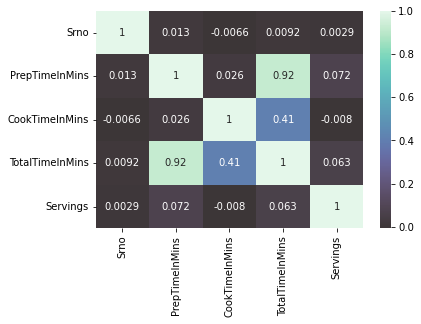

In [61]:
# Heatmap of the correlation of different parameters. 
sns.heatmap(data.corr(),annot=True, cmap='mako', alpha=0.8) # alpha-opacity, annot, cmap...

In [62]:
# we can note the relation between the different types of Diets & the total time they take to get cooked.
'''
x = data.groupby('Diet')['TotalTimeInMins'].describe()  
x['mean'].max() # to find the max of all the mean/avg. of total cooking time.
'''
data.groupby('Diet',sort=True)['TotalTimeInMins'].describe()
## data.groupby(['']).mean() # for a column
## data.groupby('Diet').mean()['TotalTimeInMins'] # to pull out only the mean/avg. part from the table

,count,mean,std,min,25%,50%,75%,max
Diet,,,,,,,,
Diabetic Friendly,260.0,69.557692,129.702304,0.0,30.00,40.0,50.00,1440.0
Eggetarian,344.0,68.043605,170.851771,4.0,30.00,45.0,60.00,2925.0
Gluten Free,50.0,93.440000,129.781789,7.0,31.25,50.0,85.00,620.0
High Protein Non Vegetarian,225.0,51.297778,31.451426,0.0,35.00,45.0,55.00,270.0
High Protein Vegetarian,705.0,71.317730,113.463318,10.0,35.00,45.0,55.00,1470.0
No Onion No Garlic (Sattvic),73.0,42.534247,14.863342,10.0,35.00,40.0,50.00,90.0
Non Vegeterian,427.0,64.243560,57.731544,15.0,40.00,50.0,70.00,570.0
Sugar Free Diet,14.0,41.428571,22.051389,15.0,21.25,42.5,48.75,90.0
Vegan,61.0,71.475410,145.846221,10.0,25.00,40.0,60.00,980.0


we can see that `Sugar free diet (has 14 entries)` takes the least amount of time to prepare & `Gluten free diet (50 entries)` 
takes the max amount of time to cook & serve. 

In [64]:
'''
x = df[(df['grade']=='A') | (df['grade']=='B')]

plt.figure(figsize=(10,5))
t = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='grade',data=f_and_g,order = t,hue='YO')


plt.figure(figsize=(12,4))
t = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,order = t,palette='MAKO' )

df.corr()['diet'].sort_values()
df.groupby('total_acc').mean()['diet']
'''


"\nx = df[(df['grade']=='A') | (df['grade']=='B')]\n\nplt.figure(figsize=(10,5))\nt = sorted(f_and_g['sub_grade'].unique())\nsns.countplot(x='grade',data=f_and_g,order = t,hue='YO')\n\n\nplt.figure(figsize=(12,4))\nt = sorted(df['grade'].unique())\nsns.countplot(x='grade',data=df,order = t,palette='MAKO' )\n\ndf.corr()['diet'].sort_values()\ndf.groupby('total_acc').mean()['diet']\n"